## STEP 1 - Importing libraries

In [321]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## STEP 2 - Importing Datasets

In [246]:
import os
os.chdir("C://Users//KOMAL//Desktop//data//loan prediction(approval)")

In [322]:
loan=pd.read_csv('train.csv')
test_loan=pd.read_csv("test.csv")

In [323]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [324]:
master= pd.concat([loan,test_loan])

In [325]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 76.6+ KB


## STEP 3 - Data cleaning

In [326]:
master.duplicated().sum()

0

In [327]:
master

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN


In [328]:
master.isna().sum().sum()

600

In [329]:
master.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [330]:
# Approaching married 1st because it has lowest nas
master[master.Married.isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [331]:
master.Married.value_counts()

Yes    631
No     347
Name: Married, dtype: int64

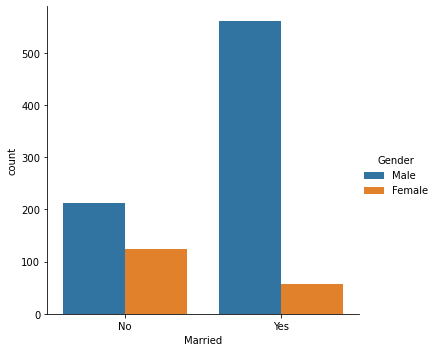

In [332]:
sns.catplot(x='Married',hue='Gender', kind='count', data=master)

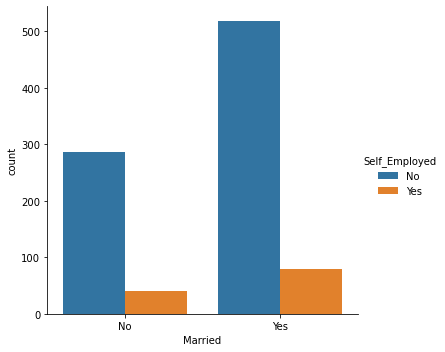

In [333]:
sns.catplot(x='Married',hue='Self_Employed', kind='count', data=master)

In [334]:
master.loc[[104,228],'Married']='Yes'

In [335]:
master.loc[435,"Married"]='No'

In [336]:
master.isna().sum()

Loan_ID                0
Gender                24
Married                0
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [337]:
master[master.Dependents.isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,Yes,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,Yes,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [338]:
master.Dependents.value_counts()

0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64

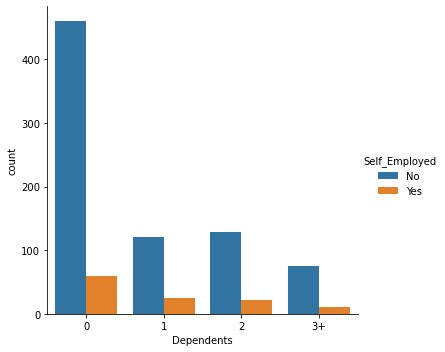

In [339]:
sns.catplot(x='Dependents',hue='Self_Employed', kind='count', data=master)

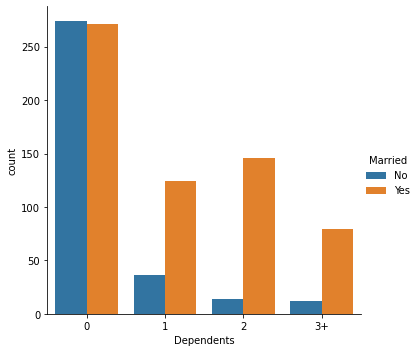

In [340]:
sns.catplot(x='Dependents',hue='Married', kind='count', data=master)

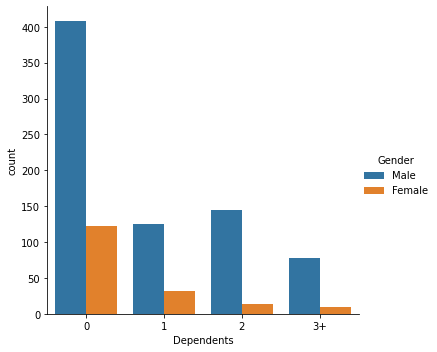

In [341]:
sns.catplot(x='Dependents',hue='Gender', kind='count', data=master)

In [342]:
# going with mode as i didn't find any pattern
master.Dependents.fillna(0, inplace=True)

In [343]:
master.Dependents[master.Dependents=="3+"]=int(4)

E:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [344]:
master.Dependents.value_counts()

0    545
1    160
2    160
4     91
0     25
Name: Dependents, dtype: int64

In [345]:
master["Dependents"] = master["Dependents"].astype(str).astype(int)

In [346]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            981 non-null    object 
 3   Dependents         981 non-null    int32  
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(7)
memory usage: 92.6+ KB


In [347]:
master.isna().sum()

Loan_ID                0
Gender                24
Married                0
Dependents             0
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [348]:
master[master.Gender.isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,4,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,4,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [349]:
master.Property_Area.value_counts()

Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

In [350]:
master.Gender.fillna('Male', inplace=True)

In [351]:
master.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [352]:
master.Loan_Amount_Term.value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [353]:
master[master.Loan_Amount_Term.isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N
44,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
73,LP001250,Male,Yes,4,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
112,LP001391,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N
165,LP001574,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y
197,LP001669,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
223,LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
232,LP001770,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y


In [354]:
master[master.Loan_Amount_Term==6.0]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
325,LP002802,Male,No,0,Graduate,No,2875,2416.0,95.0,6.0,0.0,Semiurban,NaN


In [355]:
master.Loan_Amount_Term.fillna(360.0, inplace=True)

In [356]:
master.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term       0
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [357]:
master.Credit_History.value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [358]:
master[master.Credit_History.isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
42,LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y
79,LP001264,Male,Yes,4,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,LP002853,Female,No,0,Not Graduate,No,3015,2000.0,145.0,360.0,NaN,Urban,NaN
351,LP002901,Male,No,0,Graduate,No,2283,15000.0,106.0,360.0,NaN,Rural,NaN
358,LP002954,Male,Yes,2,Not Graduate,No,3132,0.0,76.0,360.0,NaN,Rural,NaN
360,LP002965,Female,Yes,0,Graduate,No,8550,4255.0,96.0,360.0,NaN,Urban,NaN


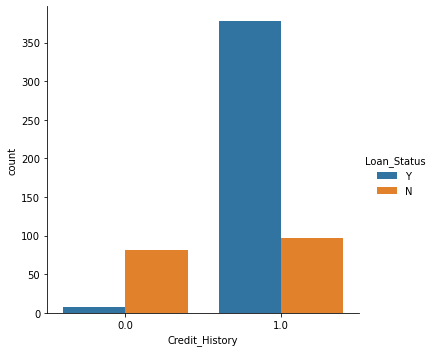

In [359]:
sns.catplot(x="Credit_History",hue="Loan_Status", kind='count', data=master)

In [360]:
master.Credit_History.fillna(1, inplace=True)

In [361]:
master.Credit_History.value_counts()

1.0    833
0.0    148
Name: Credit_History, dtype: int64

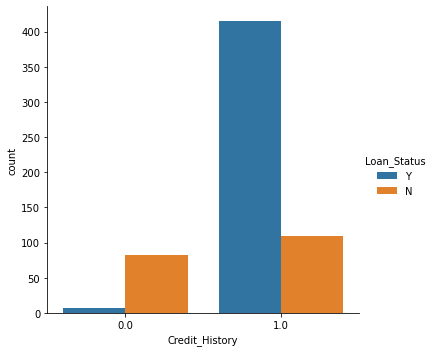

In [362]:
sns.catplot(x="Credit_History",hue="Loan_Status", kind='count', data=master)

In [363]:
master.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [364]:
master.Self_Employed.value_counts()

No     807
Yes    119
Name: Self_Employed, dtype: int64

In [365]:
master.Self_Employed.fillna("NO", inplace=True)

In [366]:
master.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [367]:
master[master.LoanAmount.isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,Male,No,0,Graduate,NO,6782,0.0,NaN,360.0,1.0,Urban,N
102,LP001350,Male,Yes,0,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,LP001682,Male,Yes,4,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N


In [368]:
master.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [369]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             981 non-null    object 
 2   Married            981 non-null    object 
 3   Dependents         981 non-null    int32  
 4   Education          981 non-null    object 
 5   Self_Employed      981 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   981 non-null    float64
 10  Credit_History     981 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(7)
memory usage: 92.6+ KB


In [370]:
df_train=master[master.Loan_Status.isna()==False]

In [371]:
master

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,4,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,1.0,Semiurban,NaN
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN


In [372]:
df_train=df_train.dropna()

In [373]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            592 non-null    object 
 1   Gender             592 non-null    object 
 2   Married            592 non-null    object 
 3   Dependents         592 non-null    int32  
 4   Education          592 non-null    object 
 5   Self_Employed      592 non-null    object 
 6   ApplicantIncome    592 non-null    int64  
 7   CoapplicantIncome  592 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   592 non-null    float64
 10  Credit_History     592 non-null    float64
 11  Property_Area      592 non-null    object 
 12  Loan_Status        592 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(7)
memory usage: 46.2+ KB


In [374]:
df_test=master[master.Loan_Status.isna()]

## STEP 4 - Model Trianing

In [375]:
df_train=df_train.drop("Loan_ID", axis=1)

In [376]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             592 non-null    object 
 1   Married            592 non-null    object 
 2   Dependents         592 non-null    int32  
 3   Education          592 non-null    object 
 4   Self_Employed      592 non-null    object 
 5   ApplicantIncome    592 non-null    int64  
 6   CoapplicantIncome  592 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   592 non-null    float64
 9   Credit_History     592 non-null    float64
 10  Property_Area      592 non-null    object 
 11  Loan_Status        592 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 43.9+ KB


In [377]:
X=pd.get_dummies(df_train, drop_first=True )

In [380]:
X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1
5,2,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0,1
610,4,4106,0.0,40.0,180.0,1.0,1,1,0,0,0,0,1
611,1,8072,240.0,253.0,360.0,1.0,1,1,0,0,0,1,1
612,2,7583,0.0,187.0,360.0,1.0,1,1,0,0,0,1,1


In [379]:
X=X.drop("Self_Employed_No", axis=1)

In [384]:
X["Education_not_graduate"]= X["Education_Not Graduate"]

In [386]:
X=X.drop('Education_Not Graduate', axis=1)

In [387]:
X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,Education_not_graduate
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,1,0,1,1,0
3,0,2583,2358.0,120.0,360.0,1.0,1,1,0,0,1,1,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,1,1,0
5,2,5417,4196.0,267.0,360.0,1.0,1,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,1,0
610,4,4106,0.0,40.0,180.0,1.0,1,1,0,0,0,1,0
611,1,8072,240.0,253.0,360.0,1.0,1,1,0,0,1,1,0
612,2,7583,0.0,187.0,360.0,1.0,1,1,0,0,1,1,0


In [388]:
X.Loan_Status_Y.value_counts()

1    411
0    181
Name: Loan_Status_Y, dtype: int64

In [389]:
df_x=X.drop("Loan_Status_Y", axis=1)

In [390]:
df_y=X.Loan_Status_Y

In [391]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df_x,df_y, test_size=0.1)

In [308]:
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import GridSearchCV
params = {'max_depth':[9,11,13,15,17,21]}


regressor = DecisionTreeClassifier()


model = GridSearchCV(regressor, params, cv=5)
model.fit(X_train,y_train)

model

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [9, 11, 13, 15, 17, 21]})

In [392]:
model.cv_results_

{'mean_fit_time': array([0.00850015, 0.00700002, 0.00850005, 0.00700006, 0.0065002 ,
        0.00700002]),
 'std_fit_time': array([0.00122481, 0.00099995, 0.00122489, 0.00100009, 0.00122481,
        0.00099995]),
 'mean_score_time': array([0.00400009, 0.00350013, 0.00250015, 0.00300007, 0.00399995,
        0.00400014]),
 'std_score_time': array([1.22477291e-03, 1.22473398e-03, 1.16800773e-07, 1.00002290e-03,
        1.22485078e-03, 1.22471451e-03]),
 'param_max_depth': masked_array(data=[9, 11, 13, 15, 17, 21],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 9},
  {'max_depth': 11},
  {'max_depth': 13},
  {'max_depth': 15},
  {'max_depth': 17},
  {'max_depth': 21}],
 'split0_test_score': array([0.71028037, 0.68224299, 0.70093458, 0.70093458, 0.71028037,
        0.6728972 ]),
 'split1_test_score': array([0.76635514, 0.73831776, 0.70093458, 0.70093458, 0.72897196,
        0.68224299]),
 'split2_t

In [393]:
print(model.best_params_,model.best_score_,model.best_estimator_)

{'max_depth': 11} 0.7369423382119555 DecisionTreeClassifier(max_depth=11)


In [395]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
X_tl, y_tl = tl.fit_sample(df_x,df_y)

In [403]:
X_tl

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Education_not_graduate
0,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0
1,0,3000,0.0,66.0,360.0,1.0,1,1,1,0,1,0
2,0,2583,2358.0,120.0,360.0,1.0,1,1,0,0,1,1
3,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,1,0
4,2,5417,4196.0,267.0,360.0,1.0,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
517,0,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0
518,4,4106,0.0,40.0,180.0,1.0,1,1,0,0,0,0
519,1,8072,240.0,253.0,360.0,1.0,1,1,0,0,1,0
520,2,7583,0.0,187.0,360.0,1.0,1,1,0,0,1,0


In [396]:
from sklearn.ensemble import RandomForestClassifier

random_forest=RandomForestClassifier(n_estimators=1001, max_depth=11)

In [397]:
random_forest.fit(X_tl,y_tl)

RandomForestClassifier(max_depth=11, n_estimators=1001)

In [398]:
y_pred=random_forest.predict(X_test)

In [399]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

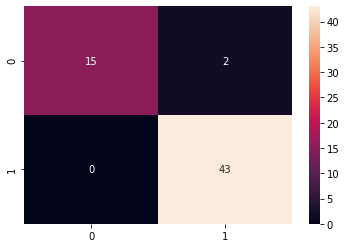

In [400]:
sns.heatmap(cm, annot=True)

In [401]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.96      1.00      0.98        43

    accuracy                           0.97        60
   macro avg       0.98      0.94      0.96        60
weighted avg       0.97      0.97      0.97        60



In [402]:
import pickle
# open a file, where you ant to store the data
file = open('last_Model.pkl', 'wb')

# dump information to that file
pickle.dump(random_forest, file)

In [ ]:
df_test.info()

In [ ]:
Y=df_test.drop(["Loan_ID","Loan_Status"], axis=1)

In [ ]:
Y=pd.get_dummies(Y, drop_first=True)

In [ ]:
Y

In [ ]:
y_sub=random_forest.predict(Y)

In [ ]:
y_sub

In [ ]:
df_test["Loan_Status"]=y_sub

In [ ]:
df_test.info()

In [ ]:
sub=df_test.copy()

In [ ]:
sub.Loan_Status[sub.Loan_Status==1]="Y"
sub.Loan_Status[sub.Loan_Status==0]="N"

In [ ]:
submission=sub[["Loan_ID","Loan_Status"]]

In [ ]:
submission.to_csv("last try.csv", index=False)

In [ ]:
test_loan

In [ ]:
master